In [1]:
from torchvision import transforms, models 
import torch

import warnings
warnings.filterwarnings(action='ignore')
import numpy as np

from data.camMethods import imageMapping
from data.camMethods import preprocessingImage
from data.camMethods import visualizationCAM
from data.camMethods import camMethod
from data.camMethods import camForSet
from data.Hook import actLayerMethod
from data.Hook import maxActivisionValue
from data.Hook import weightFromLayer
from sklearn.decomposition import PCA

from data.camAnalysis import shrinkVectors
from data.camAnalysis import vectorForSet


Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
                 It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe


C:\anaconda\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] Не найдена указанная процедура
  warn(f"Failed to load image Python extension: {e}")


In [2]:
PATH_TO_SET = 'dataset/catset'

In [3]:
listImage = imageMapping(PATH_TO_SET)  

Error in callback <function flush_figures at 0x000000001F73CDC0> (for post_execute):


KeyboardInterrupt: 

In [4]:
preprocessingList = preprocessingImage(listImage)

In [5]:
model = models.resnet50()
model.load_state_dict(torch.load('model_parameters/resnet50-0676ba61.pth'))
model.eval()
print()

In [6]:
features, predictionList = actLayerMethod(model, preprocessingList)                                       

In [7]:
indexNumpy = maxActivisionValue(predictionList)

In [8]:
weight = weightFromLayer(model, 'fc')

In [9]:
vectors = vectorForSet(features, weight, indexNumpy)
print('Shape of vectors :', vectors.shape) # 49 -> features, 41 -> sampling


Shape of vectors : (41, 49)


In [10]:
comp = 25
pcaFromBox = shrinkVectors(vectors, comp)
print(pcaFromBox.shape)
inVectorForm = pcaFromBox.reshape(pcaFromBox.shape[0], pcaFromBox.shape[1] * pcaFromBox.shape[2])

(41, 5, 5)


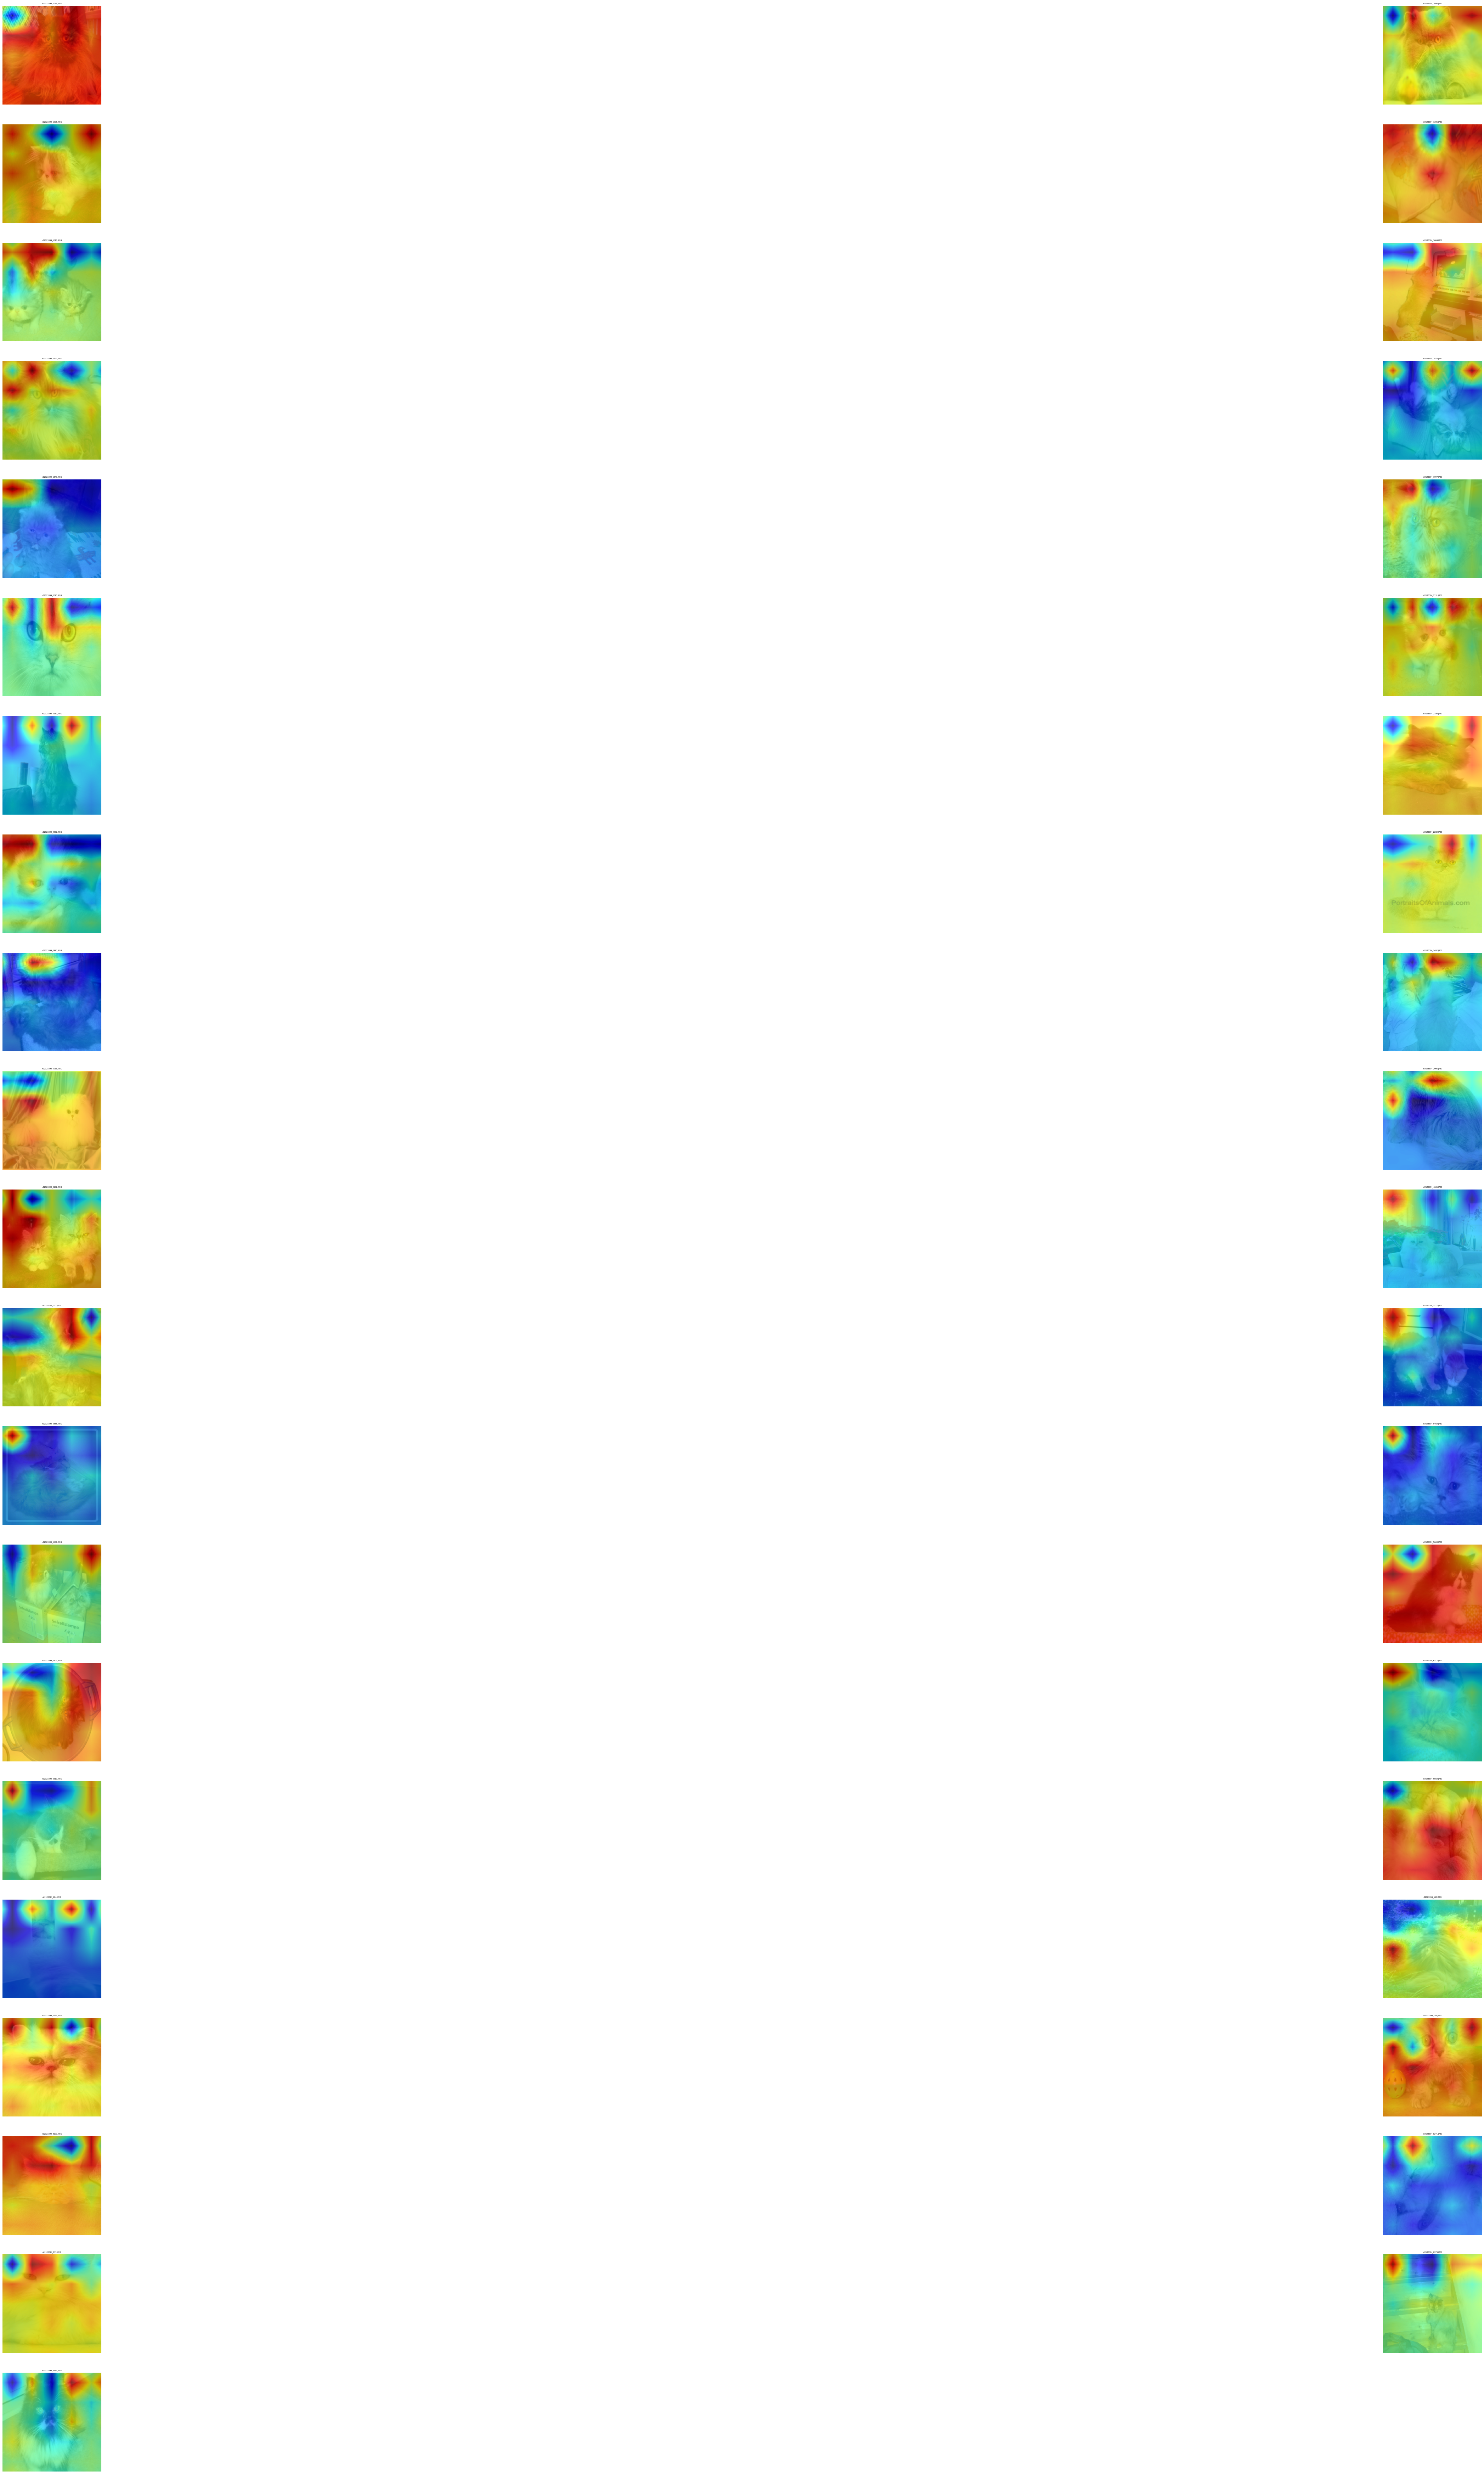

In [11]:
visualizationCAM(PATH_TO_SET, pcaFromBox)